In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

In [155]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_90_v2.csv', index_col=0)
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age,per_LTV,per_LTV_cate
0,199000.0,199000.00,60,F,STREET VENDOR,20000.0,PU,NISSAN,FRONTIER NAVARA,2012,AD,283500,S1,2022-11-14,S1,PL,44,11,70.194004,65-75%
1,60000.0,58822.04,36,M,อื่นๆ,14000.0,CAR,TOYOTA,COROLLA ALTIS,2002,AJ,111000,S1,2022-09-06,S1,PL,53,21,54.054054,50-65%
2,36000.0,35904.37,24,F,พนักงานบริษัท,15000.0,MC,HONDA,CLICK 150I,2019,BH,48500,S1,2022-12-30,S2,PL,32,4,74.226804,65-75%
3,30000.0,28813.69,24,F,เกษตรกร,35000.0,MC,HONDA,PCX 150,2020,ED,76500,S1,2022-11-12,S1,PL,37,3,39.215686,30-50%
4,200000.0,200000.00,36,M,พนักงานบริษัท,40000.0,PU,ISUZU,D-MAX,2013,BU,414500,S1,2022-12-29,S1,PL,57,10,48.250905,30-50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,14000.0,14000.00,12,F,STREET VENDOR,15000.0,MC,YAMAHA,FINO (MLEKE),2009,AH,23000,S3,2022-12-24,S2,NPL,67,14,60.869565,65-75%
4025,45000.0,45000.00,18,F,พนักงานบริษัท,40000.0,MC,HONDA,PCX 150,2017,CQ,61500,S3,2022-12-27,S2,NPL,35,6,73.170732,65-75%
4027,144000.0,144000.00,60,M,ข้าราชการ,36000.0,CAR,TOYOTA,VIOS,2010,DX,222000,S3,2022-12-29,S2,NPL,54,13,64.864865,65-75%
4029,39000.0,39000.00,36,F,พนักงานบริษัท,15000.0,MC,HONDA,DREAM 110I,2017,CO,53000,S3,2022-12-29,S2,NPL,35,6,73.584906,65-75%


In [156]:
df = df.rename(columns=lambda x: x.strip().replace(' ', '_'))
df.head()

,Principal_Approve_Amount,Principal_Amount,Repayment_Tenor_Month_Number,Gender,Occupation_Description,Total_Income_Amount_(Month),Collateral_Type_Code,Vehicle_Brand,Vehicle_Model,Vehicle_Release_Year,Vehicle_Sub_Model,Evaluation_Amount,System_CAR_Code_(Daily),System_CAR_Code_Date,Final_CAR_Code_Previous_Month,DPD,age,Vehicle_Age,per_LTV,per_LTV_cate
0,199000.0,199000.00,60,F,STREET VENDOR,20000.0,PU,NISSAN,FRONTIER NAVARA,2012,AD,283500,S1,2022-11-14,S1,PL,44,11,70.194004,65-75%
1,60000.0,58822.04,36,M,อื่นๆ,14000.0,CAR,TOYOTA,COROLLA ALTIS,2002,AJ,111000,S1,2022-09-06,S1,PL,53,21,54.054054,50-65%
2,36000.0,35904.37,24,F,พนักงานบริษัท,15000.0,MC,HONDA,CLICK 150I,2019,BH,48500,S1,2022-12-30,S2,PL,32,4,74.226804,65-75%
3,30000.0,28813.69,24,F,เกษตรกร,35000.0,MC,HONDA,PCX 150,2020,ED,76500,S1,2022-11-12,S1,PL,37,3,39.215686,30-50%
4,200000.0,200000.00,36,M,พนักงานบริษัท,40000.0,PU,ISUZU,D-MAX,2013,BU,414500,S1,2022-12-29,S1,PL,57,10,48.250905,30-50%


In [157]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model','per_LTV_cate']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:['F' 'M']

Occupation_Description:['STREET VENDOR' 'อื่นๆ' 'พนักงานบริษัท' 'เกษตรกร' 'ข้าราชการ'
 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'อาจารย์' 'พนักงานรัฐวิสาหกิจ']

Collateral_Type_Code:['PU' 'CAR' 'MC' 'VAN' 'TRUCK']

Vehicle_Brand:['NISSAN' 'TOYOTA' 'HONDA' 'ISUZU' 'YAMAHA' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KAWASAKI' 'FORD' 'RYUKA' 'VESPA' 'GPX' 'HINO' 'MG' 'CHEVROLET' 'TATA'
 'KIA' 'STALLION' 'HYUNDAI' 'PROTON' 'LAMBRETTA' 'BENELLI']

Vehicle_Model:['FRONTIER NAVARA' 'COROLLA ALTIS' 'CLICK 150I' 'PCX 150' 'D-MAX'
 'HILUX TIGER' 'SCOOPY I' 'WAVE 110 I' 'MARCH' 'TTX 115' 'WAVE X'
 'DREAM 110' 'GRAND FILANO 125' 'HILUX VIGO' 'ALMERA' 'VIOS' 'TRITON'
 'CITY' 'MIO 115' 'MSX 125' 'M-SLAZ 150' 'CIVIC' 'CLICK 125I' 'CAMRY'
 'MT 15' 'CB 150' 'SUPER CUB 110' 'WAVE 125 I' 'FINO (MLEKE)' 'XTRAIL'
 'DREAM 110I' 'COROLLA' 'WAVE 100' 'BT-50' 'PCX 160' 'JAZZ' 'CR-V'
 'SMASH 115' 'CIAZ' 'QBIX 125 S' 'CLICK 110' 'AEROX 155' 'ER6N 650'
 'NP300' 'WAVE 125' 'WAVE 125 X' 'MIRAGE' 'MIO 125' 'SWIFT' 

In [158]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [159]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [160]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model','System_CAR_Code_(Daily)','Final_CAR_Code_Previous_Month','per_LTV_cate']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [161]:
category = ['Gender','Occupation_Description','Collateral_Type_Code','Vehicle_Brand','Vehicle_Model','per_LTV_cate']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Gender:[0 1]

Occupation_Description:[0 6 3 7 1 8 2 5 4]

Collateral_Type_Code:[2 0 1 4 3]

Vehicle_Brand:[14 20  5  7 22 13 11 18  8  2 16 21  3  4 12  1 19  9 17  6 15 10  0]

Vehicle_Model:[ 78  39  34 133  49  89 154 190 108 185 196  54  81  90   6 188 184  28
 110 117 107  29  33  14 118  18 175 193  71 201  55  38 189  12 135  93
  42 161  27 143  31   4  60 129 192 194 114 112 177   0  76  70   2  35
   7 144 202 155  45  13 106  77 100 102  64 119  16   3  19 176  86  52
  69 134 191 153  83 162  53  65  51  68  32 121 164  37  72 109 171 179
 174  66  30 198 103 208  10  73 120  99  63  74 159 169 204  96  36   1
 199 149  79  75 131 123 116  48   5 148  97 168 127 200  88  92 206 203
 195  82 139 167 141 178  67  91 130 163   8 197  17  43 105 166 180  59
   9 113 128  15 126  44  50  98 138 137  11 173 186  26 115  56  23 142
 205  47 182  80  58 147 152  94 101  85  25 122 157 170  84  46 165 156
 172 111  40  87 136 146  22 124  57 140 150 160  24 104  41 151  95 181
 145 

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal_Approve_Amount       3410 non-null   float64
 1   Principal_Amount               3410 non-null   float64
 2   Repayment_Tenor_Month_Number   3410 non-null   int64  
 3   Gender                         3410 non-null   int32  
 4   Occupation_Description         3410 non-null   int32  
 5   Total_Income_Amount_(Month)    3410 non-null   float64
 6   Collateral_Type_Code           3410 non-null   int32  
 7   Vehicle_Brand                  3410 non-null   int32  
 8   Vehicle_Model                  3410 non-null   int32  
 9   Vehicle_Release_Year           3410 non-null   int64  
 10  Vehicle_Sub_Model              3410 non-null   object 
 11  Evaluation_Amount              3410 non-null   int64  
 12  System_CAR_Code_(Daily)        3410 non-null   i

In [163]:
df.describe().round(2)

,Principal_Approve_Amount,Principal_Amount,Repayment_Tenor_Month_Number,Gender,Occupation_Description,Total_Income_Amount_(Month),Collateral_Type_Code,Vehicle_Brand,Vehicle_Model,Vehicle_Release_Year,Evaluation_Amount,System_CAR_Code_(Daily),Final_CAR_Code_Previous_Month,age,Vehicle_Age,per_LTV,per_LTV_cate
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,3.61,19168.37,1.03,10.15,121.26,2012.75,120642.87,0.29,0.1,41.23,10.25,66.04,2.69
std,79271.47,79109.90,16.23,0.50,2.61,7843.54,0.66,7.03,64.95,5.32,122898.83,0.51,0.3,10.71,5.32,23.76,1.02
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00,3.02,0.00
25%,22525.00,21643.71,24.00,0.00,1.00,13500.00,1.00,5.00,55.00,2009.00,35000.00,0.00,0.0,33.00,6.00,62.86,3.00
50%,30000.00,29975.93,36.00,0.00,3.00,18000.00,1.00,5.00,132.50,2013.00,44000.00,0.00,0.0,40.00,10.00,71.43,3.00
75%,125750.00,124864.20,60.00,1.00,6.00,24805.00,1.00,20.00,190.00,2017.00,209375.00,1.00,0.0,49.00,14.00,74.88,3.00
max,314000.00,314000.00,60.00,1.00,8.00,41308.00,4.00,22.00,208.00,2022.00,831000.00,2.00,2.0,72.00,33.00,657.14,4.00


In [164]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [165]:
df.head(5)

,Principal_Approve_Amount,Principal_Amount,Repayment_Tenor_Month_Number,Gender,Occupation_Description,Total_Income_Amount_(Month),Collateral_Type_Code,Vehicle_Brand,Vehicle_Model,Vehicle_Release_Year,Vehicle_Sub_Model,Evaluation_Amount,System_CAR_Code_(Daily),System_CAR_Code_Date,Final_CAR_Code_Previous_Month,DPD,age,Vehicle_Age,per_LTV,per_LTV_cate
0,199000.0,199000.00,60,0,0,20000.0,2,14,78,2012,AD,283500,0,2022-11-14,0,PL,44,11,70.194004,3
1,60000.0,58822.04,36,1,6,14000.0,0,20,39,2002,AJ,111000,0,2022-09-06,0,PL,53,21,54.054054,2
2,36000.0,35904.37,24,0,3,15000.0,1,5,34,2019,BH,48500,0,2022-12-30,1,PL,32,4,74.226804,3
3,30000.0,28813.69,24,0,7,35000.0,1,5,133,2020,ED,76500,0,2022-11-12,0,PL,37,3,39.215686,1
4,200000.0,200000.00,36,1,3,40000.0,2,7,49,2013,BU,414500,0,2022-12-29,0,PL,57,10,48.250905,1


In [166]:
df.describe().round(2)

,Principal_Approve_Amount,Principal_Amount,Repayment_Tenor_Month_Number,Gender,Occupation_Description,Total_Income_Amount_(Month),Collateral_Type_Code,Vehicle_Brand,Vehicle_Model,Vehicle_Release_Year,Evaluation_Amount,System_CAR_Code_(Daily),Final_CAR_Code_Previous_Month,age,Vehicle_Age,per_LTV,per_LTV_cate
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,3.61,19168.37,1.03,10.15,121.26,2012.75,120642.87,0.29,0.1,41.23,10.25,66.04,2.69
std,79271.47,79109.90,16.23,0.50,2.61,7843.54,0.66,7.03,64.95,5.32,122898.83,0.51,0.3,10.71,5.32,23.76,1.02
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00,3.02,0.00
25%,22525.00,21643.71,24.00,0.00,1.00,13500.00,1.00,5.00,55.00,2009.00,35000.00,0.00,0.0,33.00,6.00,62.86,3.00
50%,30000.00,29975.93,36.00,0.00,3.00,18000.00,1.00,5.00,132.50,2013.00,44000.00,0.00,0.0,40.00,10.00,71.43,3.00
75%,125750.00,124864.20,60.00,1.00,6.00,24805.00,1.00,20.00,190.00,2017.00,209375.00,1.00,0.0,49.00,14.00,74.88,3.00
max,314000.00,314000.00,60.00,1.00,8.00,41308.00,4.00,22.00,208.00,2022.00,831000.00,2.00,2.0,72.00,33.00,657.14,4.00


In [167]:
#sns.pairplot(df, hue="DPD")

<Figure size 1500x1000 with 0 Axes>

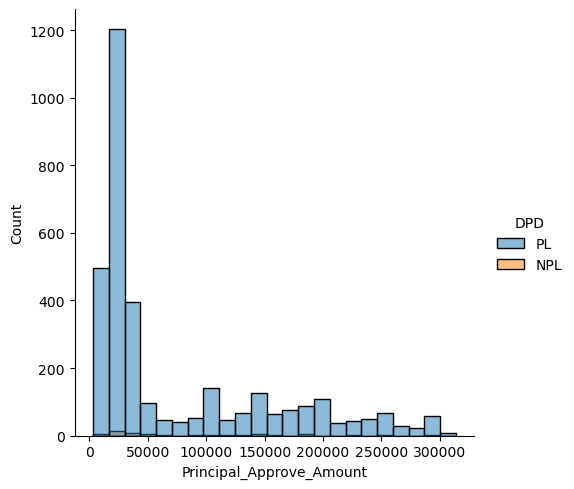

In [168]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="Principal_Approve_Amount", hue="DPD")

<Figure size 1500x1000 with 0 Axes>

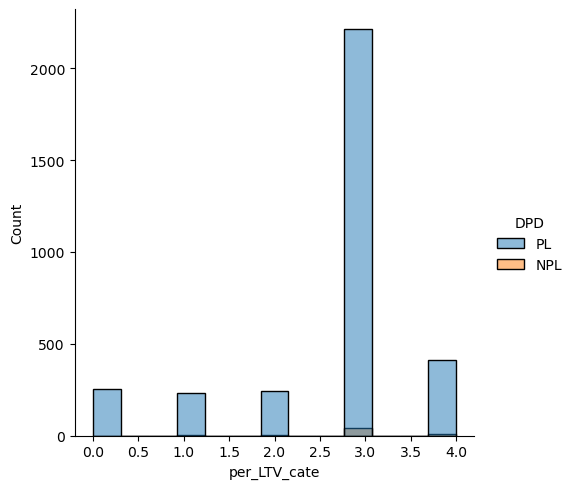

In [169]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="per_LTV_cate", hue="DPD")

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Principal_Approve_Amount', ylabel='Density'>

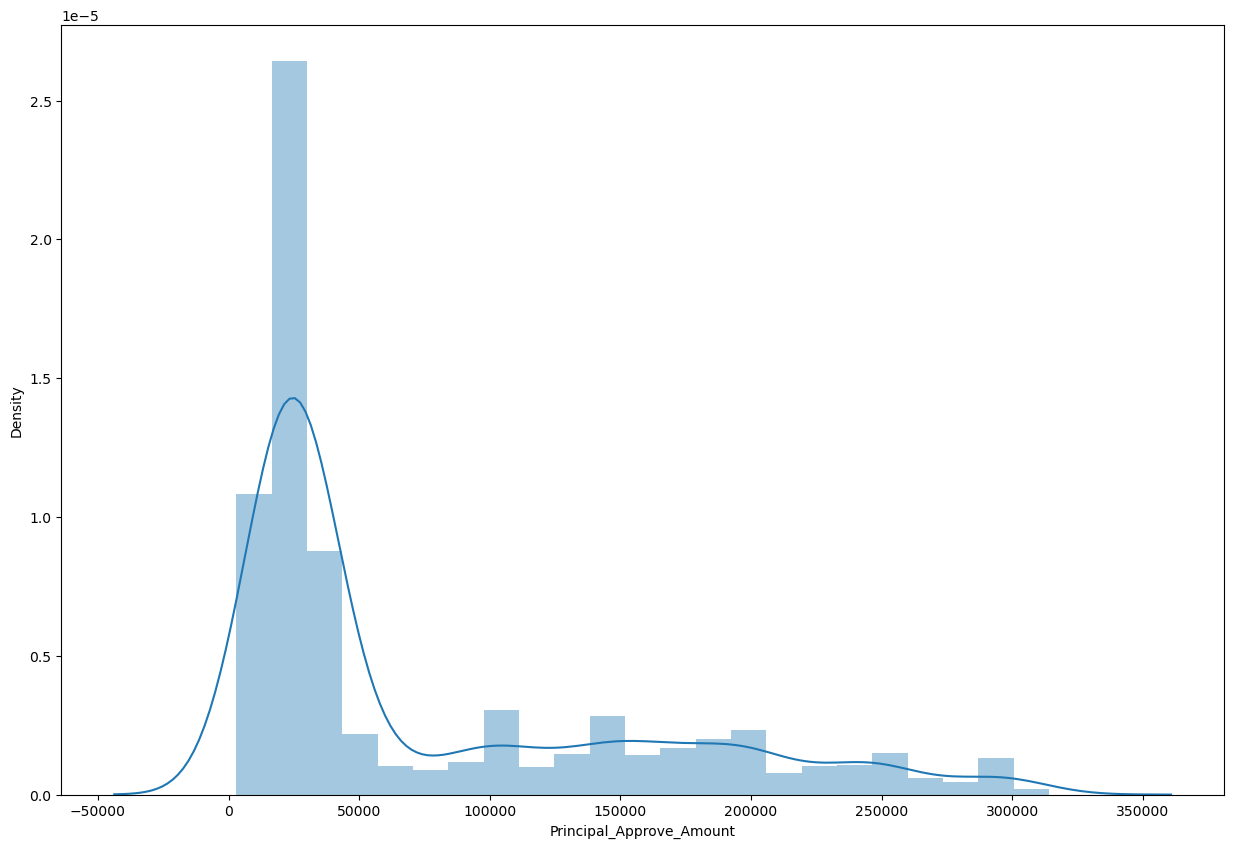

In [170]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal_Approve_Amount'])

In [171]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [172]:
df.columns

Index(['Principal_Approve_Amount', 'Principal_Amount',
       'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand',
       'Vehicle_Model', 'Vehicle_Release_Year', 'Vehicle_Sub_Model',
       'Evaluation_Amount', 'System_CAR_Code_(Daily)', 'System_CAR_Code_Date',
       'Final_CAR_Code_Previous_Month', 'DPD', 'age', 'Vehicle_Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [173]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age','per_LTV_cate']]

In [174]:


X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

# Train Test Split

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

In [177]:
X_train.shape

(1875, 13)

In [178]:
X_test.shape

(1535, 13)

In [179]:
y_train.shape

(1875,)

In [180]:
y_test.shape

(1535,)

In [181]:
df[df['DPD']=='PL'].shape

(3355, 20)

In [182]:
df[df['DPD']=='NPL'].shape

(55, 20)

In [183]:
y_train.value_counts()

PL     1834
NPL      41
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

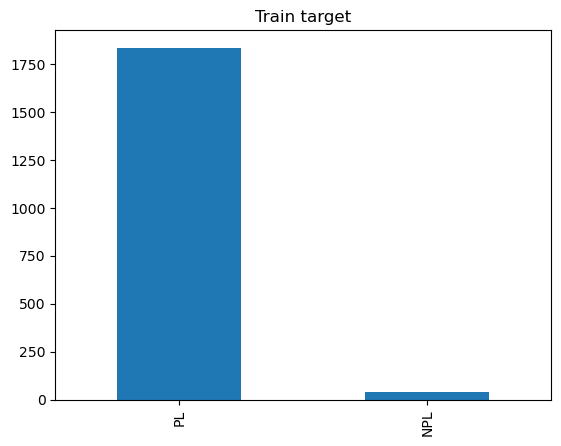

In [184]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

In [185]:
df.shape

(3410, 20)

# Imbalance Oversampling SMOTE

In [186]:
#pip install imblearn

In [187]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [188]:
#Fitting SMOTE to the train set
smote = SMOTE(random_state=101)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [189]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(smote_y_train))

Before sampling class distribution :  Counter({'PL': 1834, 'NPL': 41})
After sampling class distribution :  Counter({'PL': 1834, 'NPL': 1834})


In [190]:
smote_X_train.shape

(3668, 13)

In [191]:
smote_y_train.shape

(3668,)

In [192]:
smote_y_train.value_counts()

PL     1834
NPL    1834
Name: DPD, dtype: int64

In [193]:
y_test.value_counts()

PL     1521
NPL      14
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

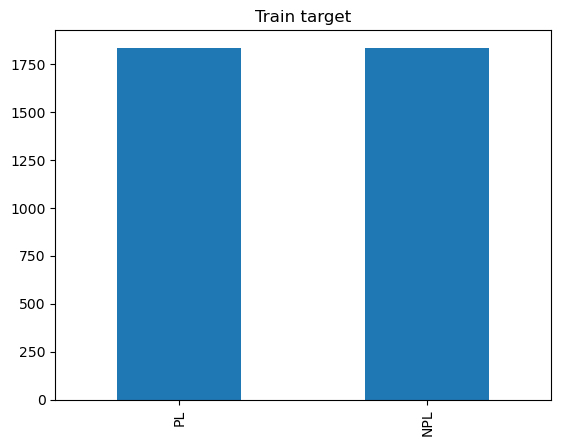

In [194]:
plt.title('Train target')
smote_y_train.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Test target'}>

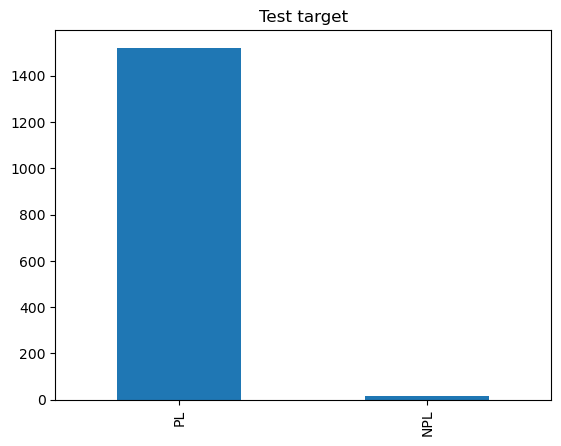

In [195]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

## Feature Importance Decisiontree

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(criterion='entropy')

In [197]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [198]:
model.feature_importances_

array([0.05319646, 0.03430413, 0.01456157, 0.05647006, 0.18832755,
       0.00637865, 0.06937538, 0.18420897, 0.01354118, 0.1841385 ,
       0.06169406, 0.07959158, 0.0542119 ])

In [199]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Total_Income_Amount_(Month)     0.188328
Vehicle_Model                   0.184209
Evaluation_Amount               0.184139
Vehicle_Age                     0.079592
Vehicle_Brand                   0.069375
age                             0.061694
Occupation_Description          0.056470
per_LTV_cate                    0.054212
Principal_Approve_Amount        0.053196
Repayment_Tenor_Month_Number    0.034304
Gender                          0.014562
Vehicle_Release_Year            0.013541
Collateral_Type_Code            0.006379
dtype: float64

In [200]:
fs.sum()

0.9999999999999999

<AxesSubplot:>

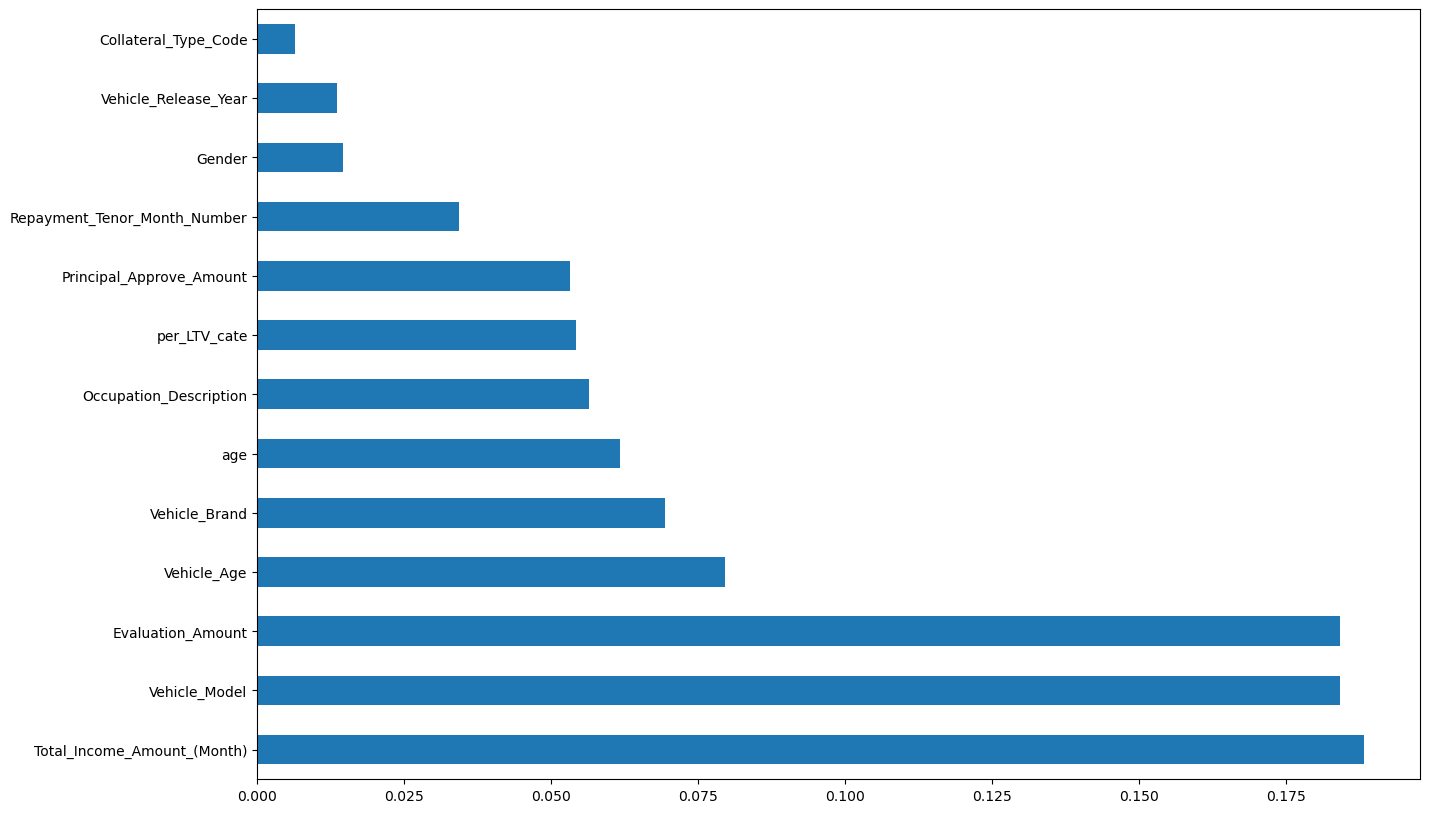

In [201]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [202]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [203]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    smote_X_train, X_test, smote_y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
    model.fit(smote_X_train, smote_y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation mean is ", np.mean(score)*100)
    print("Cross Validation std is ", np.std(score)*100)
    return model

In [204]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [205]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [206]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# cv_lr = classify(model,X,y)

In [207]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy')
# cv_dt = classify(model,X,y)

In [208]:
# sum(cv_dt.predict(X) == y)

In [209]:
# pd.crosstab(y, cv_dt.predict(X))

In [210]:
# 424/(424+54)

In [211]:
# 424/(424+68)

In [212]:
# len(y)

### DecisionTree

In [213]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [214]:
#prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, smote_X_train, smote_y_train, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 92.05211726384364
[0.89373297 0.98092643 0.96457766 0.97275204 0.95367847 0.95912807
 0.95640327 0.94822888 0.95081967 0.93989071]
Cross Validation mean is  95.20138175429193
Cross Validation std is  2.24853125078407


In [215]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   1   13]
 [ 109 1412]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.01      0.07      0.02        14
          PL       0.99      0.93      0.96      1521

    accuracy                           0.92      1535
   macro avg       0.50      0.50      0.49      1535
weighted avg       0.98      0.92      0.95      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


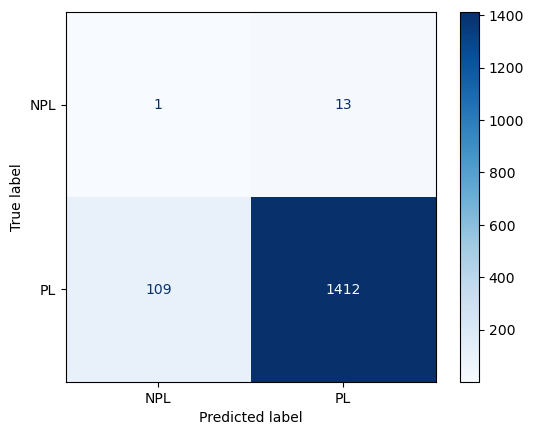

In [216]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


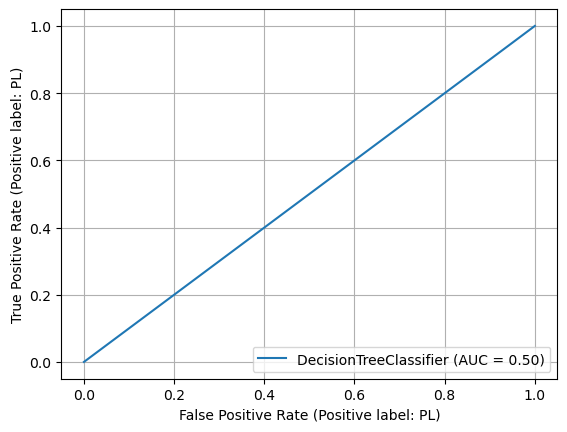

In [217]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [218]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=101)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train, smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy: 67.62214983713355
[0.94721408 0.96187683 0.96480938 0.96480938 0.96480938 0.96480938
 0.96480938 0.96187683 0.96187683 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.5079327881433653


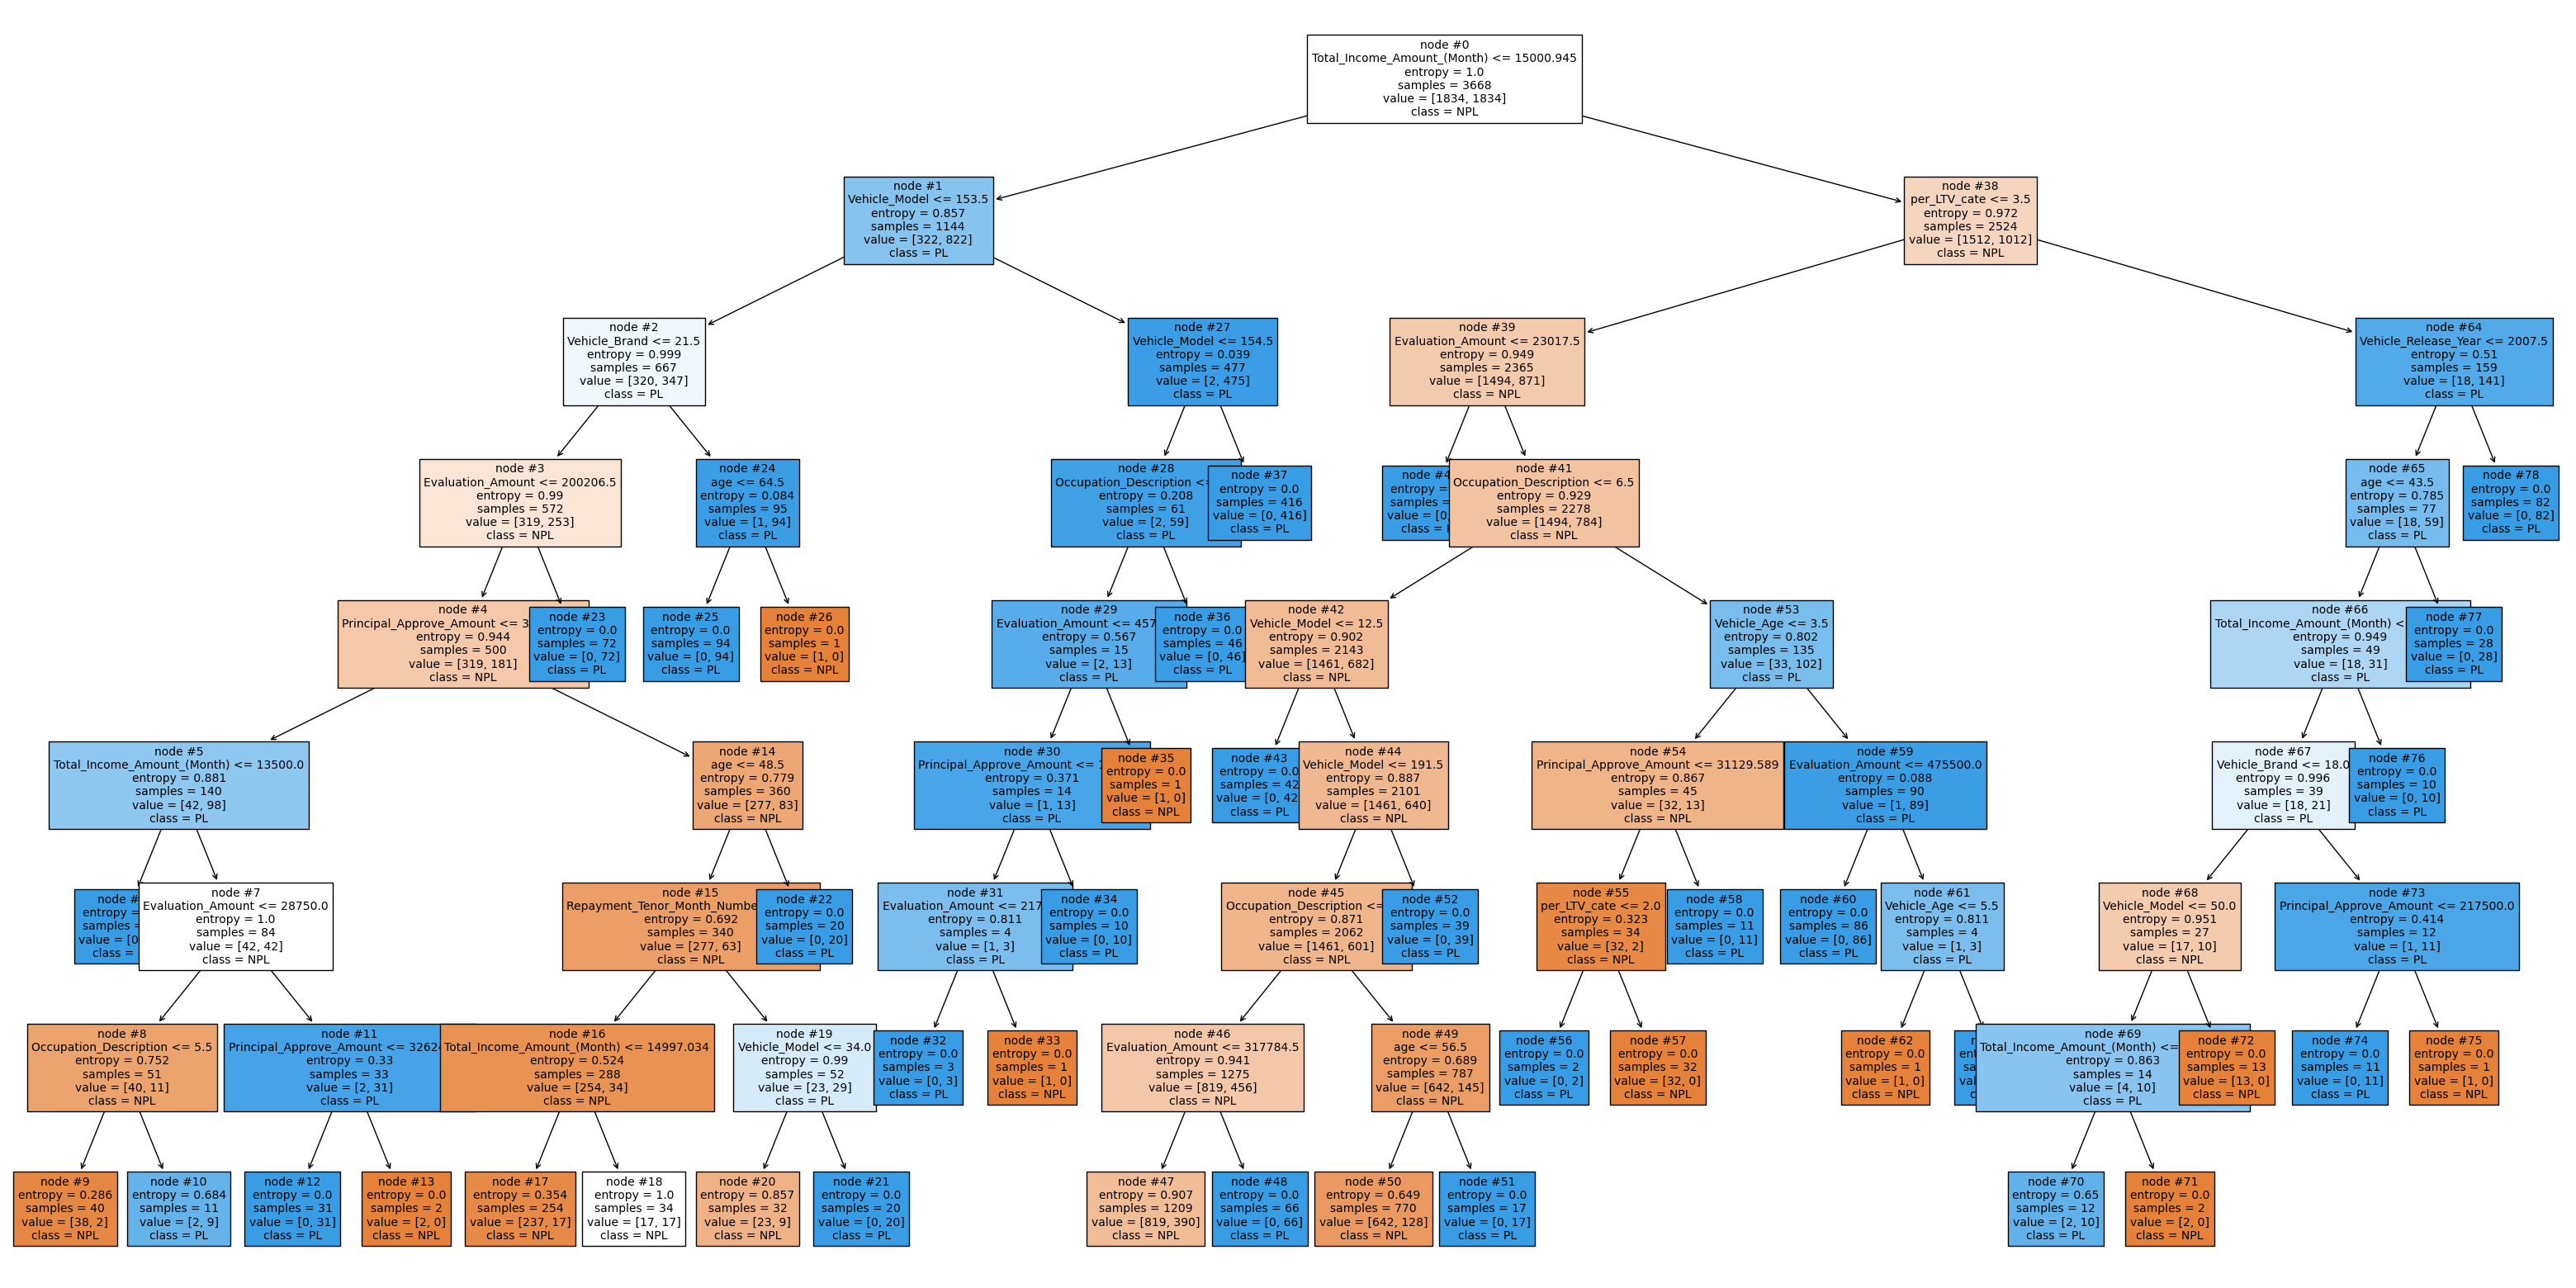

In [219]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age','per_LTV_cate'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [220]:
import graphviz

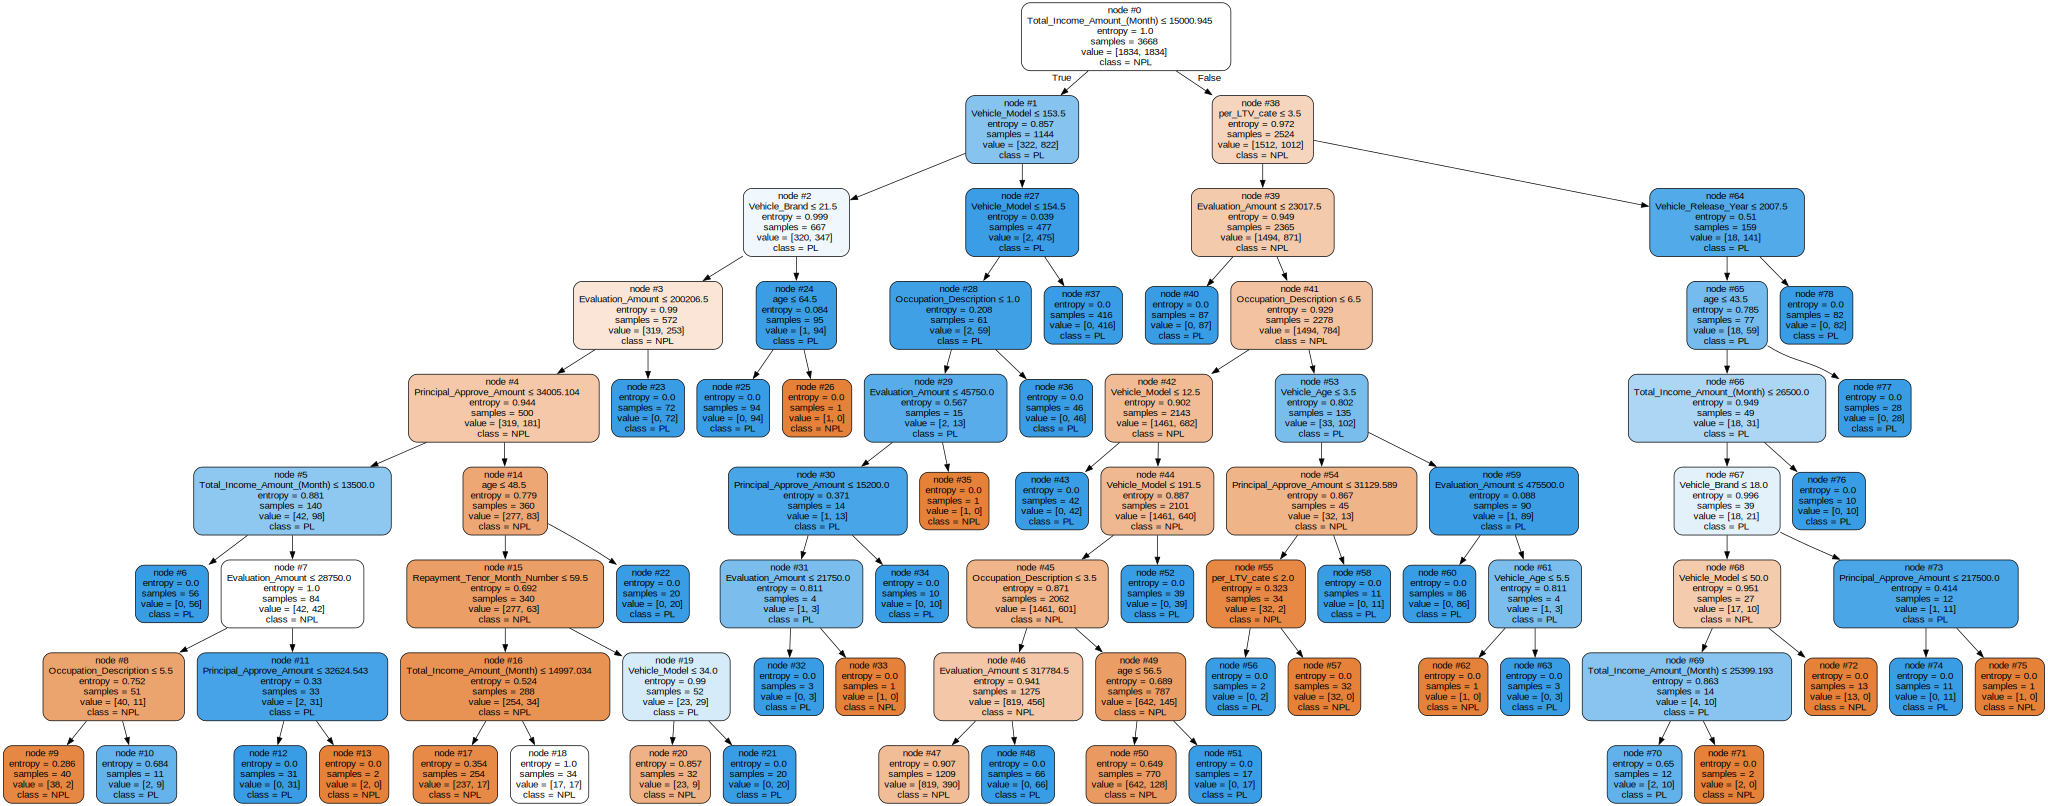

In [221]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age','per_LTV_cate'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [222]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   8    6]
 [ 491 1030]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      0.57      0.03        14
          PL       0.99      0.68      0.81      1521

    accuracy                           0.68      1535
   macro avg       0.51      0.62      0.42      1535
weighted avg       0.99      0.68      0.80      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


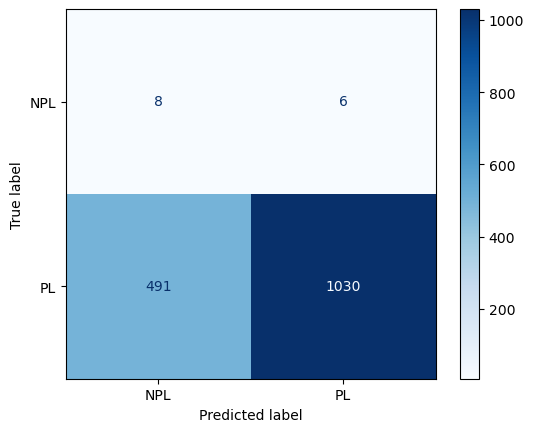

In [223]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


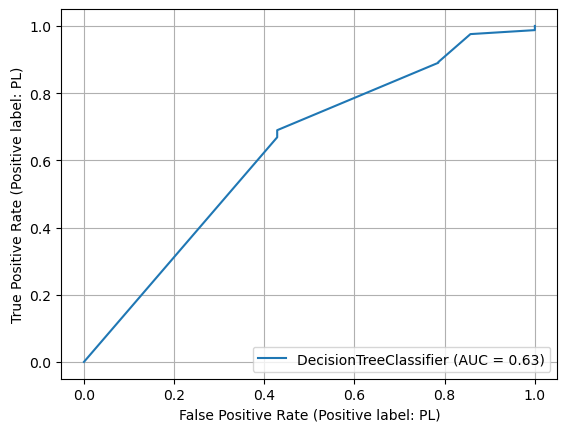

In [224]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [226]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 98.1758957654723
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation mean is  98.38709677419354
Cross Validation std is  0.14662756598240456


In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   12]
 [  16 1505]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.11      0.14      0.12        14
          PL       0.99      0.99      0.99      1521

    accuracy                           0.98      1535
   macro avg       0.55      0.57      0.56      1535
weighted avg       0.98      0.98      0.98      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


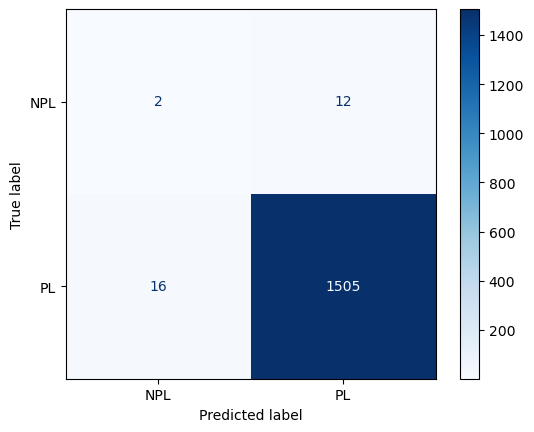

In [228]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


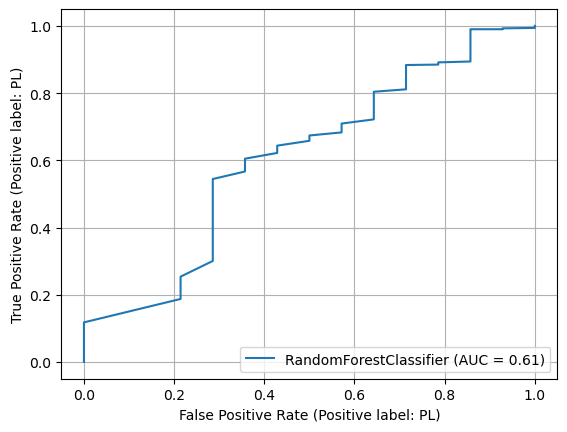

In [229]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

# Under Sampling

In [230]:
from imblearn import under_sampling, over_sampling
from collections import Counter

In [231]:
cols = df[['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age','per_LTV_cate']]

X = cols
       # test approve กับ ที่ปล่อย
# X2 = df[['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=101)

In [232]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('NPL', 55), ('PL', 55)] (110,)


In [233]:
X_resampled.shape

(110, 13)

In [234]:
y_resampled.shape

(110,)

In [235]:
X_test.shape

(1535, 13)

In [236]:
y_test.shape

(1535,)

In [237]:
y_resampled.value_counts()

NPL    55
PL     55
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Train target'}>

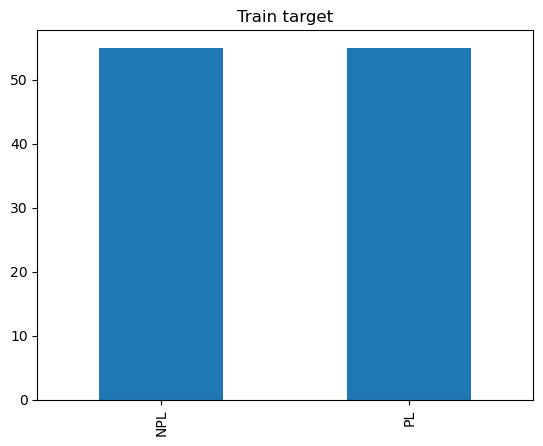

In [238]:
plt.title('Train target')
y_resampled.value_counts().plot(kind='bar')

In [239]:
y_test.value_counts()

PL     1521
NPL      14
Name: DPD, dtype: int64

<AxesSubplot:title={'center':'Test target'}>

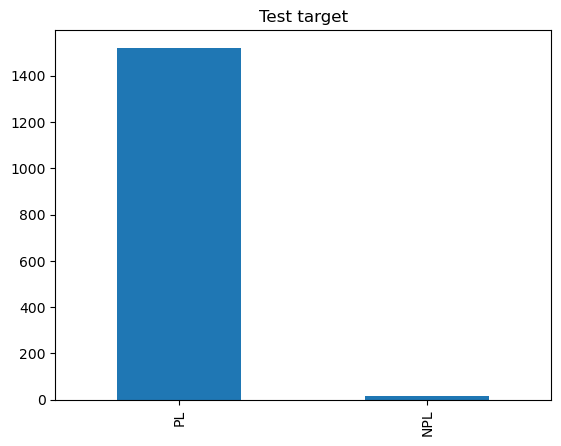

In [240]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

## Feature Importance

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy', random_state=101)

model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [242]:
X = cols
y = df['DPD']

In [243]:
model.feature_importances_

array([0.11198133, 0.02504443, 0.02504443, 0.03599564, 0.136834  ,
       0.0320916 , 0.02504443, 0.14037226, 0.04848325, 0.13972262,
       0.15440628, 0.06621251, 0.05876721])

In [244]:
fs = pd.Series(model.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

age                             0.154406
Vehicle_Model                   0.140372
Evaluation_Amount               0.139723
Total_Income_Amount_(Month)     0.136834
Principal_Approve_Amount        0.111981
Vehicle_Age                     0.066213
per_LTV_cate                    0.058767
Vehicle_Release_Year            0.048483
Occupation_Description          0.035996
Collateral_Type_Code            0.032092
Repayment_Tenor_Month_Number    0.025044
Gender                          0.025044
Vehicle_Brand                   0.025044
dtype: float64

In [245]:
fs.sum()

0.9999999999999998

<AxesSubplot:>

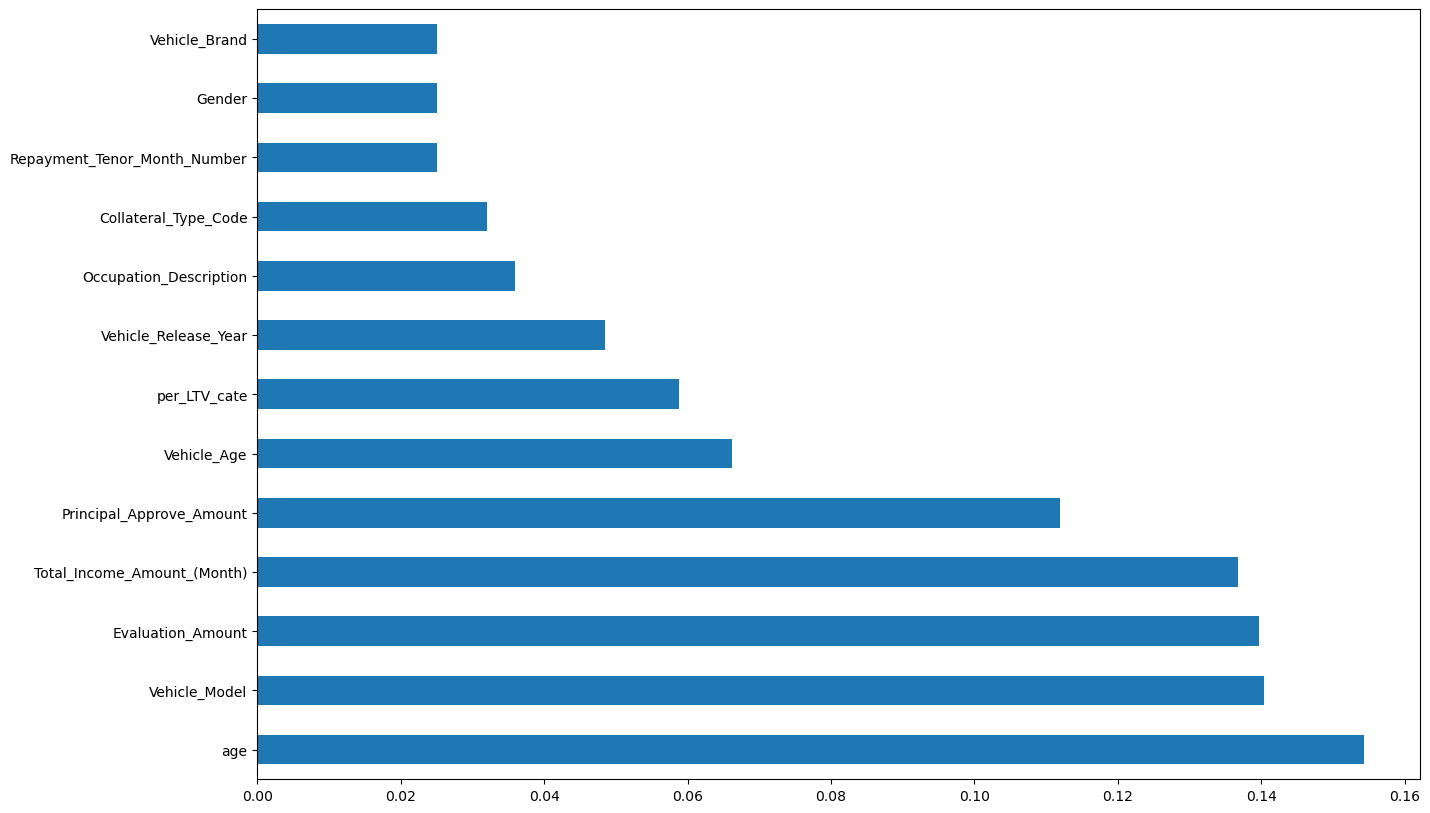

In [246]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

## Cross Validation

In [247]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    X_resampled, X_test, y_resampled, y_test = train_test_split(X, y, test_size=0.45, random_state=101)
    model.fit(X_resampled, y_resampled)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    print("Cross Validation is ", np.std(score)*100)
    return model

In [248]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state=101)
# cv_lr = classify(model,X,y)

In [249]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy', random_state=101)
# cv_dt = classify(model,X,y)

### Decision Tree

In [250]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=101)
classifier = model.fit(X_resampled,y_resampled)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [251]:
# #prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 55.11400651465797
[0.94721408 0.96187683 0.96480938 0.96480938 0.96480938 0.96480938
 0.96480938 0.96187683 0.96187683 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation std is  0.5079327881433653


In [252]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 14   0]
 [689 832]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      1.00      0.04        14
          PL       1.00      0.55      0.71      1521

    accuracy                           0.55      1535
   macro avg       0.51      0.77      0.37      1535
weighted avg       0.99      0.55      0.70      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


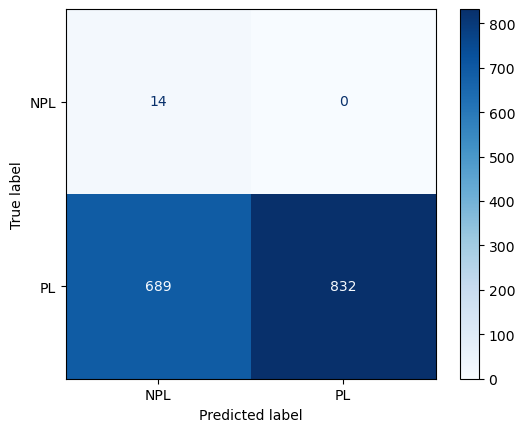

In [253]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


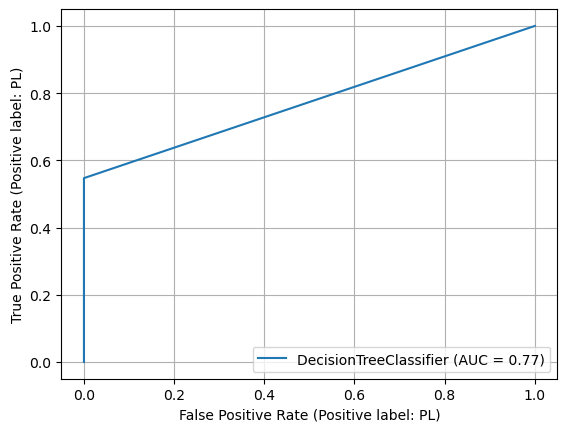

In [254]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [255]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8)
#Predict the response for test dataset
classifier = classifier.fit(X_resampled, y_resampled)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation stdis ", np.std(score)*100)

Accuracy: 58.95765472312704
[0.94721408 0.96187683 0.96480938 0.96480938 0.96480938 0.96480938
 0.96480938 0.96187683 0.96187683 0.96187683]
Cross Validation mean is  96.18768328445746
Cross Validation stdis  0.5079327881433653


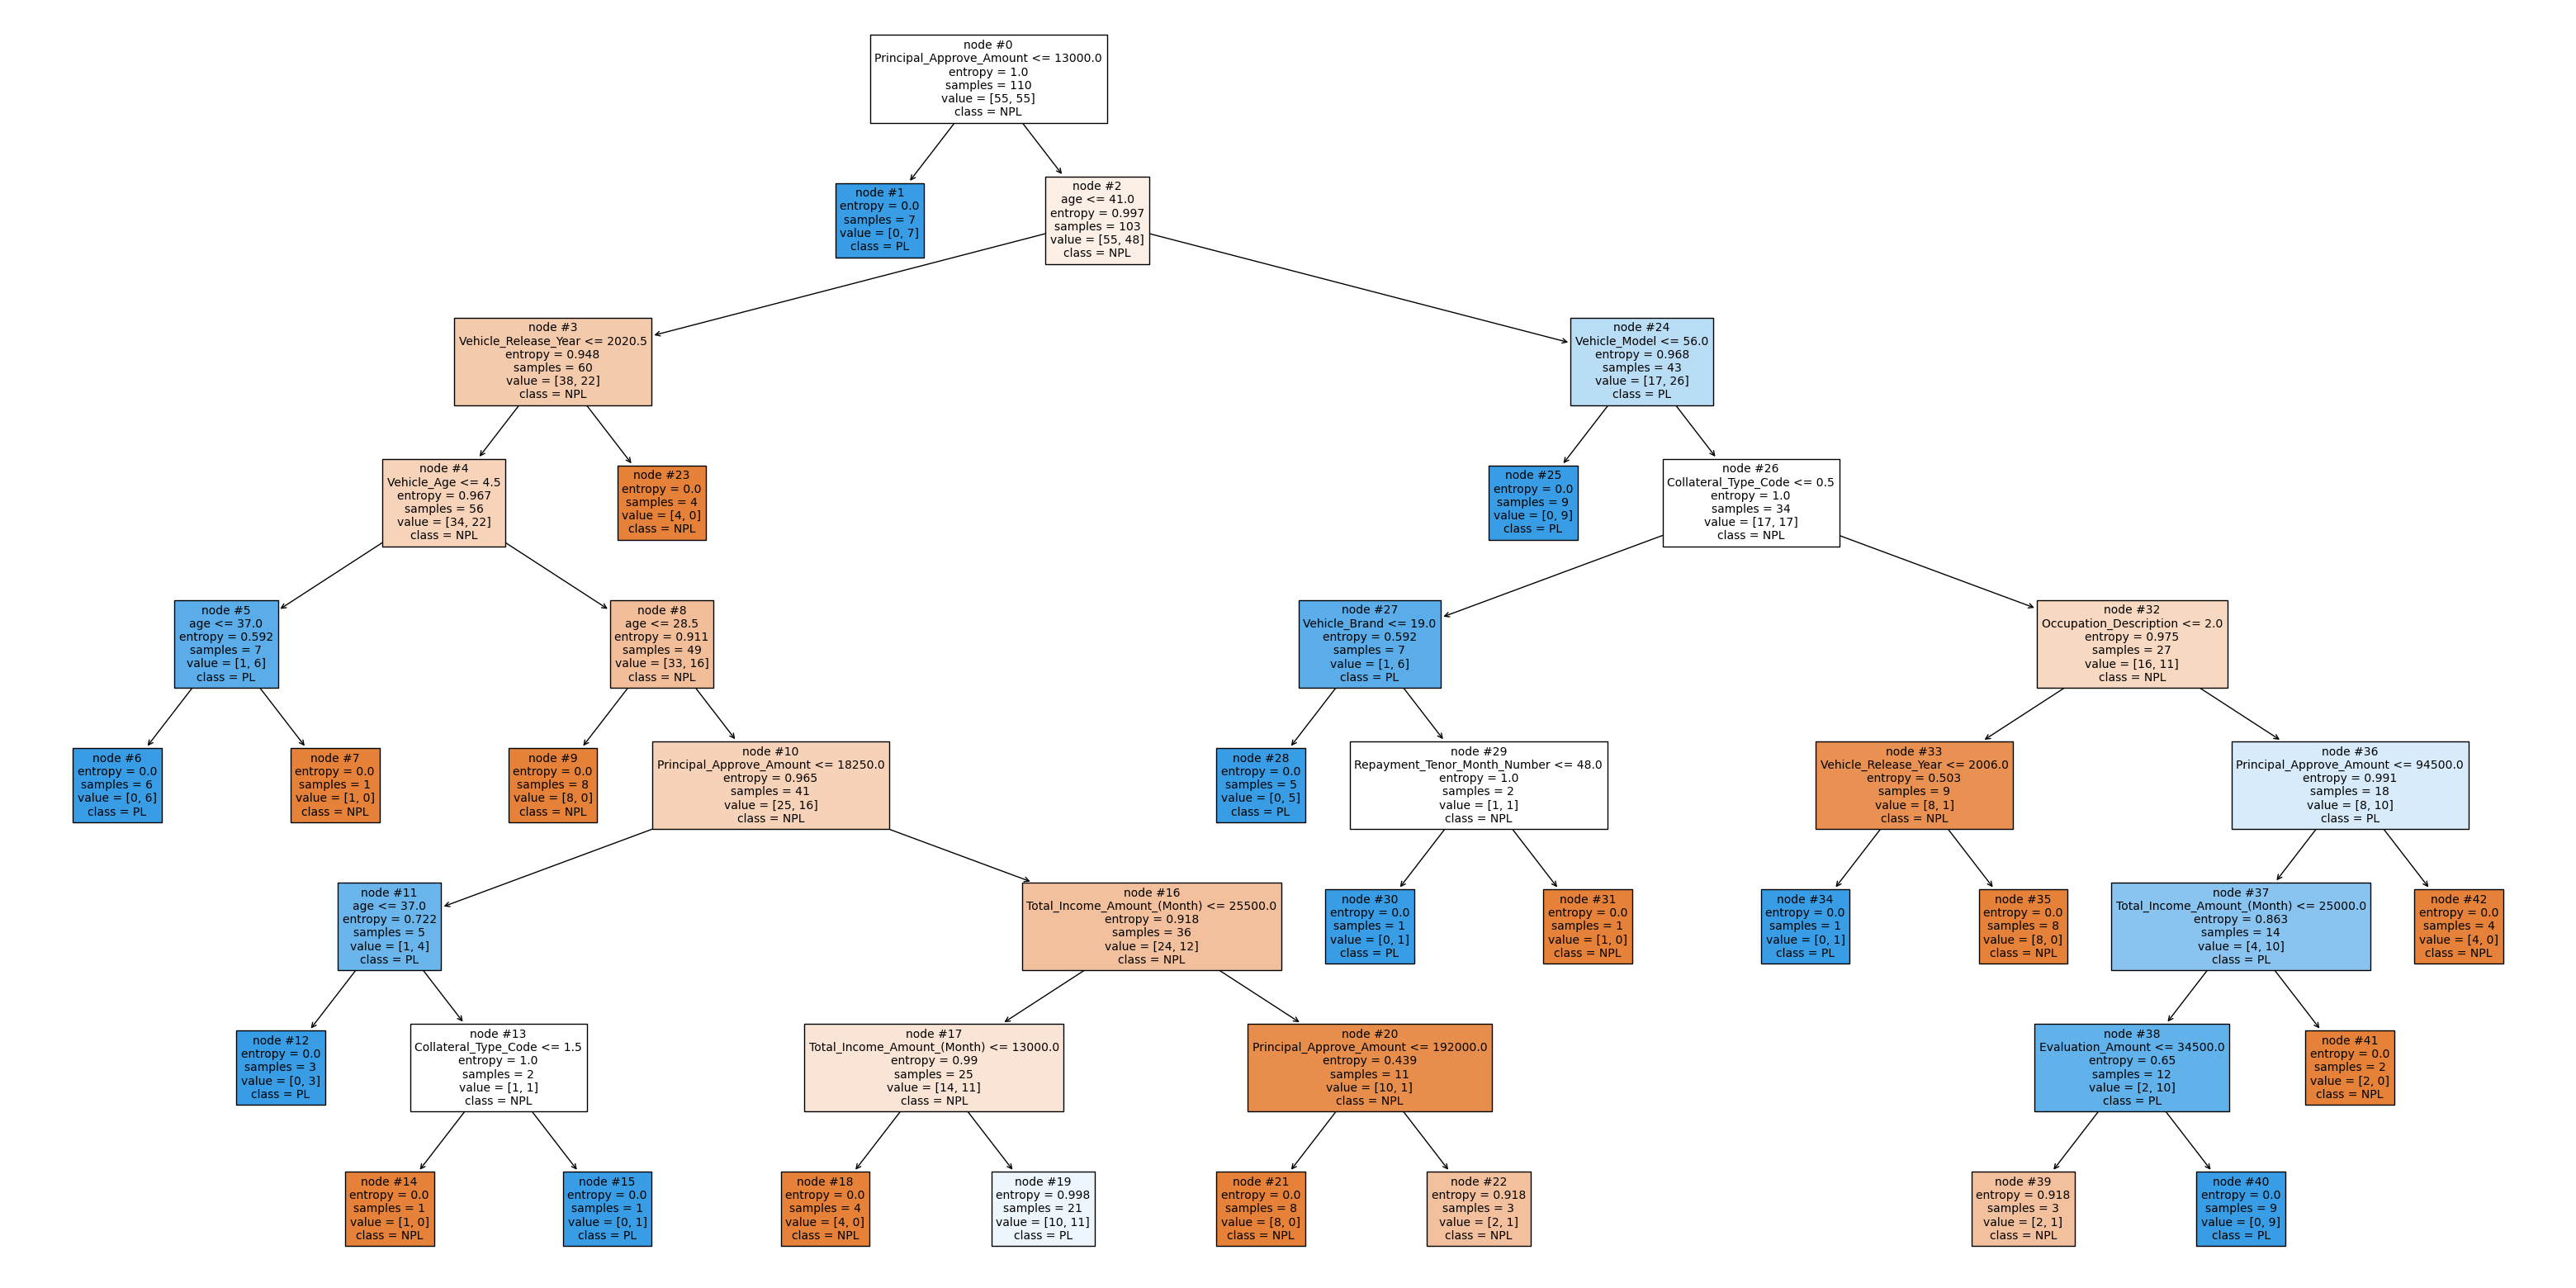

In [256]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age','per_LTV_cate'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [257]:
import graphviz

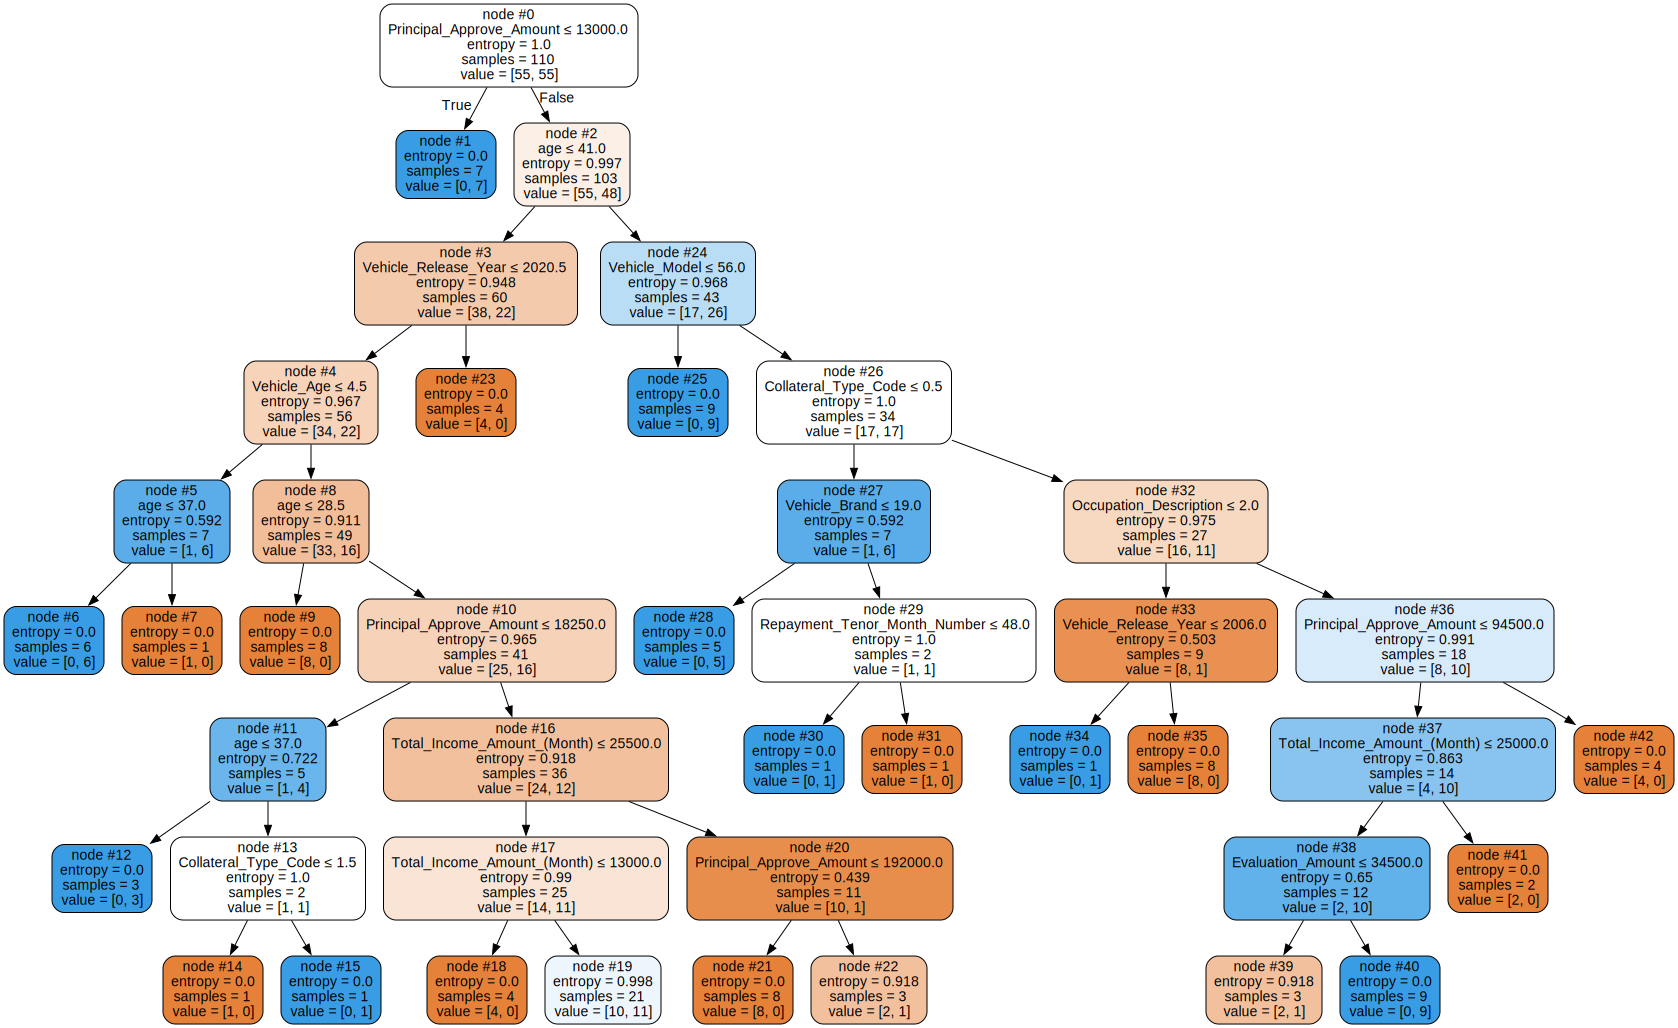

In [258]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal_Approve_Amount', 'Repayment_Tenor_Month_Number', 'Gender', 'Occupation_Description',
       'Total_Income_Amount_(Month)', 'Collateral_Type_Code', 'Vehicle_Brand','Vehicle_Model','Vehicle_Release_Year',
       'Evaluation_Amount','age','Vehicle_Age','per_LTV_cate'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [259]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 13   1]
 [629 892]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      0.93      0.04        14
          PL       1.00      0.59      0.74      1521

    accuracy                           0.59      1535
   macro avg       0.51      0.76      0.39      1535
weighted avg       0.99      0.59      0.73      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


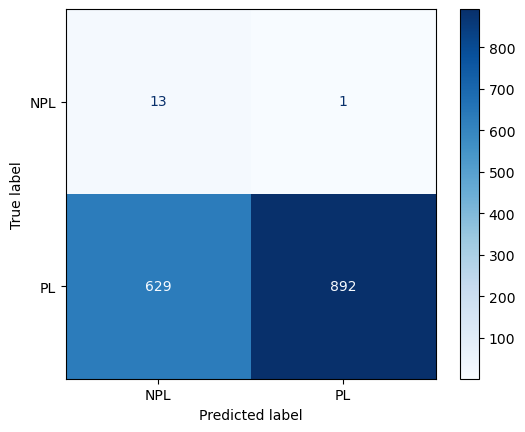

In [260]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


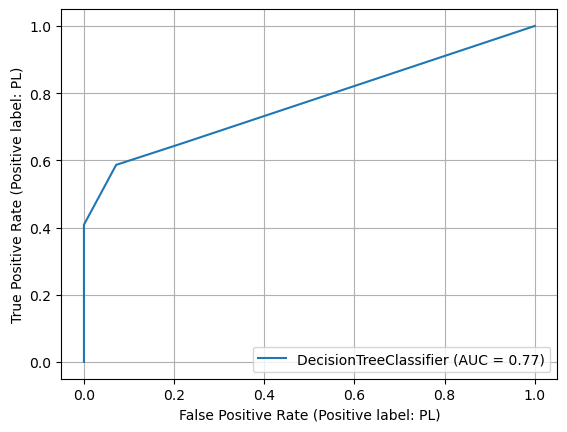

In [261]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Random Forest

In [262]:
X_resampled.head(1)

,Principal_Approve_Amount,Repayment_Tenor_Month_Number,Gender,Occupation_Description,Total_Income_Amount_(Month),Collateral_Type_Code,Vehicle_Brand,Vehicle_Model,Vehicle_Release_Year,Evaluation_Amount,age,Vehicle_Age,per_LTV_cate
0,51000.0,36,0,6,10000.0,1,5,134,2018,64500,28,5,4


In [263]:
X_new = classifier.predict([[51000,36,0,10,10000,1,5,135,2018,64500,28,5,3]])

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [264]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                                max_leaf_nodes=9, min_samples_leaf=2,
                                min_samples_split=10)
rdf_classifier = model.fit(X_resampled,y_resampled)
rdf_classifier

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=10)

### Feature Importance

In [265]:
rdf_classifier.feature_importances_

array([0.11841184, 0.05354932, 0.00780143, 0.06663307, 0.09316324,
       0.04161766, 0.03240928, 0.09038371, 0.0902916 , 0.09248453,
       0.14187113, 0.09163186, 0.07975134])

In [266]:
fs = pd.Series(rdf_classifier.feature_importances_, index=X_resampled.columns).sort_values(
    ascending=False
)
fs

age                             0.141871
Principal_Approve_Amount        0.118412
Total_Income_Amount_(Month)     0.093163
Evaluation_Amount               0.092485
Vehicle_Age                     0.091632
Vehicle_Model                   0.090384
Vehicle_Release_Year            0.090292
per_LTV_cate                    0.079751
Occupation_Description          0.066633
Repayment_Tenor_Month_Number    0.053549
Collateral_Type_Code            0.041618
Vehicle_Brand                   0.032409
Gender                          0.007801
dtype: float64

In [267]:
fs.sum()

1.0000000000000002

<AxesSubplot:>

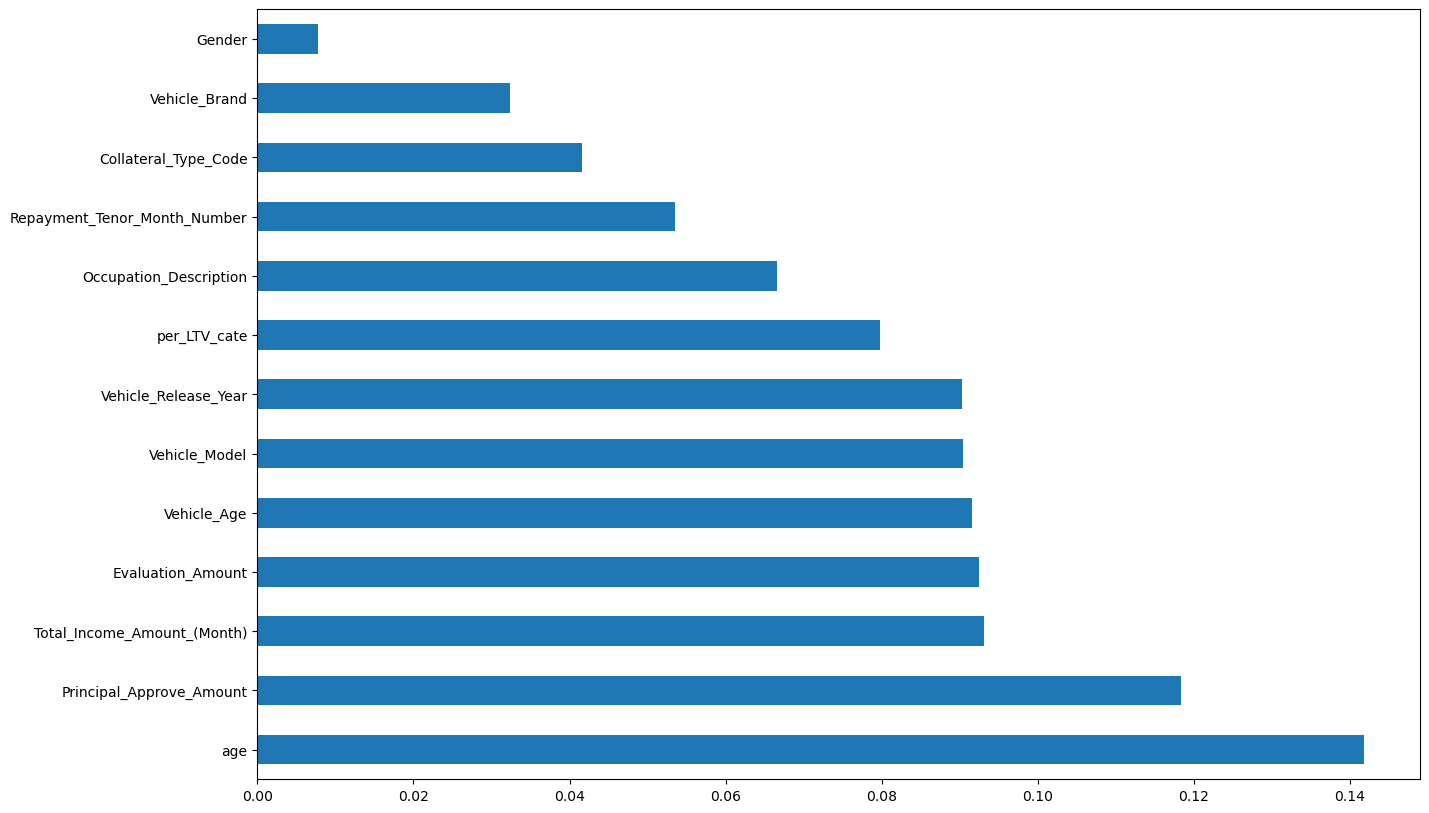

In [268]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [269]:
#pip install shap

import shap

In [270]:
explainer = shap.TreeExplainer(rdf_classifier)
shap_values = explainer.shap_values(X_resampled)

In [271]:
choosen_instance = X_resampled.loc[[100]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

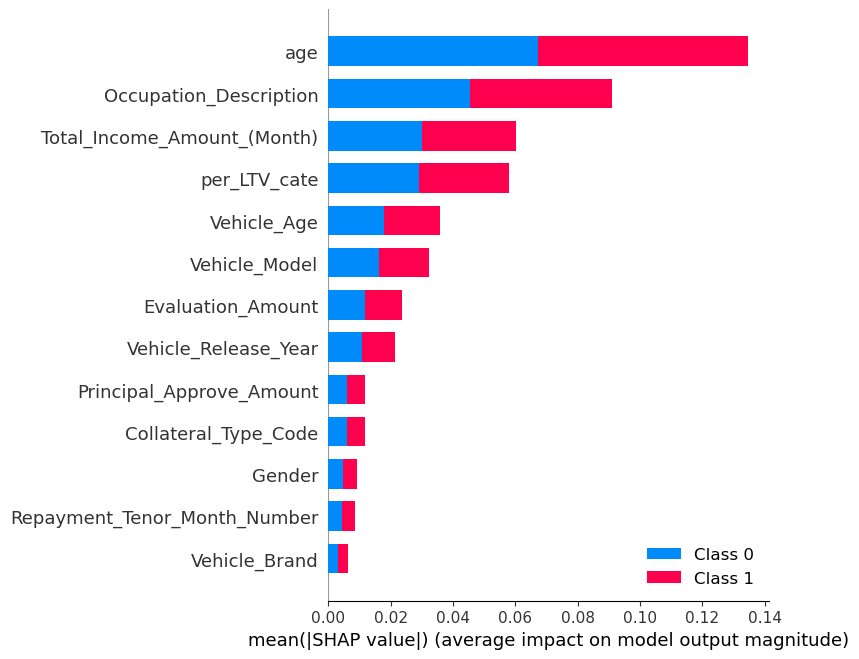

In [272]:
shap.summary_plot(shap_values, X_resampled, plot_type="bar")

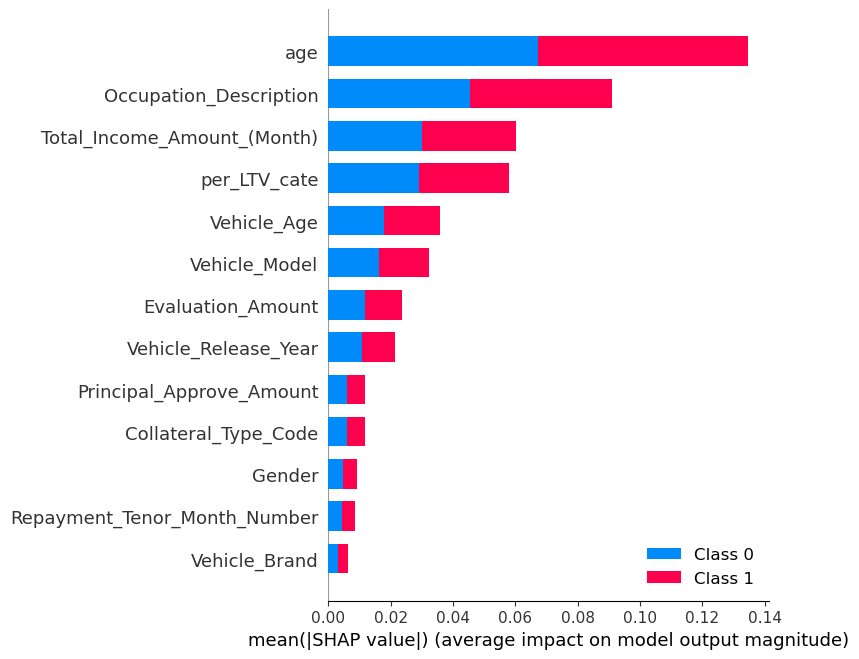

In [273]:
shap.summary_plot(shap_values, X_resampled)

In [274]:
#prediction
y_pred = rdf_classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X_resampled, y_resampled, cv=10)
print(score)
print("Cross Validation mean is ", np.mean(score)*100)
print("Cross Validation std is ", np.std(score)*100)

Accuracy Score: 58.95765472312704
[0.54545455 0.63636364 0.63636364 0.54545455 0.72727273 0.54545455
 0.27272727 0.63636364 0.45454545 0.45454545]
Cross Validation mean is  54.54545454545453
Cross Validation std is  12.196734422726127


In [275]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 13   1]
 [629 892]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.02      0.93      0.04        14
          PL       1.00      0.59      0.74      1521

    accuracy                           0.59      1535
   macro avg       0.51      0.76      0.39      1535
weighted avg       0.99      0.59      0.73      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


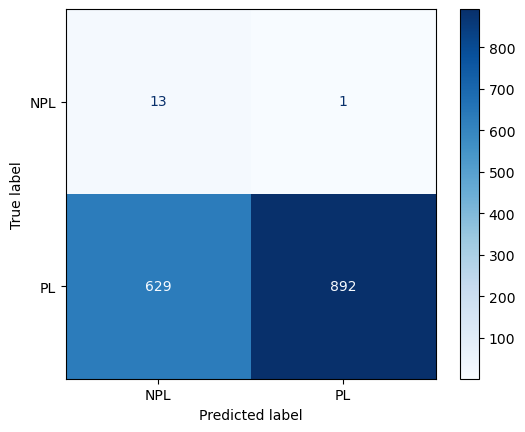

In [276]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(rdf_classifier, X_test, y_test, cmap='Blues', values_format='d')

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


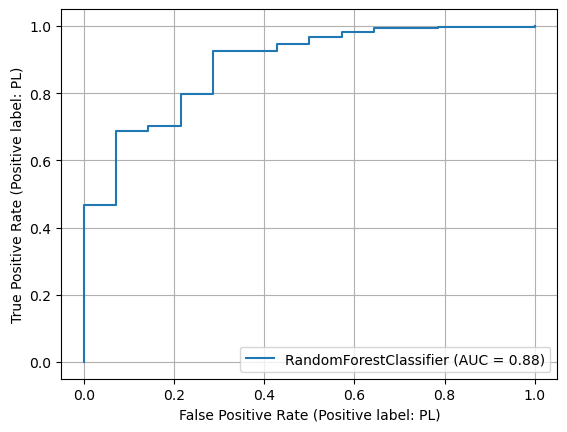

In [277]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rdf_classifier, X_test, y_test)
plt.grid()

### Export Model to Streamlit

In [278]:
import pickle

In [279]:
pickle_out = open("RandomForest.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- GridSearchCV

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

In [281]:
# # Generate a synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=101)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [282]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [3, 6, 9],
    'criterion':['gini', 'entropy']
}

In [283]:
# Instantiate a random forest classifier
rf = RandomForestClassifier(random_state=101)

In [284]:
# # Use GridSearchCV to search for the best hyperparameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='f1_macro')
# grid_search.fit(X_resampled, y_resampled)
# print(grid_search.best_estimator_)

In [295]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_*100)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.2f}%".format(accuracy*100))
print("F1 score: {:.2f}".format(f1))

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  57.54420579420578
Accuracy: 56.03%
F1 score: 0.38


In [296]:
model_grid = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt',
                                    max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
model_grid.fit(X_resampled, y_resampled)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

         NPL       0.93      0.02      0.04       642
          PL       0.59      1.00      0.74       893

    accuracy                           0.59      1535
   macro avg       0.76      0.51      0.39      1535
weighted avg       0.73      0.59      0.45      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


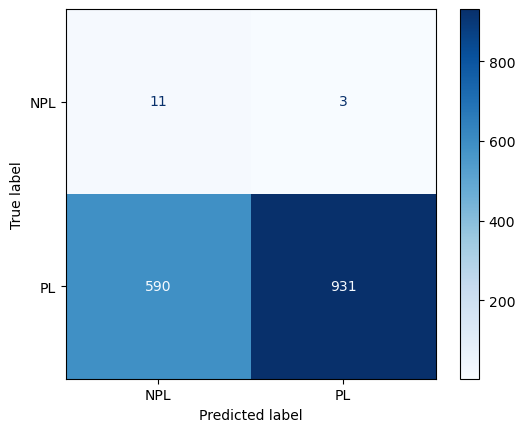

In [297]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model_grid, X_test, y_test, cmap='Blues', values_format='d')

### Export Model with Hypertuning GrifSearchCV

In [298]:
import pickle

In [299]:
pickle_out = open("RandomForest-GridSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()

### Hyperparameter Tuning- RandomizedSearchCV

In [305]:
from sklearn.model_selection import RandomizedSearchCV

In [306]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_resampled, y_resampled)
print(random_search.best_estimator_)
print("Accuracy: {:.2f}%".format(accuracy*100))

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=3,
                       min_samples_split=5, n_estimators=200)
Accuracy: 56.03%


In [307]:
# Print the best hyperparameters and corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_*100)

model_random = RandomForestClassifier(criterion='entropy',
                                      max_depth=10,
                                      max_features='log2',
                                      max_leaf_nodes=3,
                                      min_samples_split=5,
                                      n_estimators=200)
model_random.fit(X_resampled, y_resampled)
y_pred_rand = model.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy*100))
print(classification_report(y_pred_rand, y_test))

Best parameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Best score:  58.18181818181818
Accuracy: 56.03%
              precision    recall  f1-score   support

         NPL       0.93      0.02      0.04       642
          PL       0.59      1.00      0.74       893

    accuracy                           0.59      1535
   macro avg       0.76      0.51      0.39      1535
weighted avg       0.73      0.59      0.45      1535



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


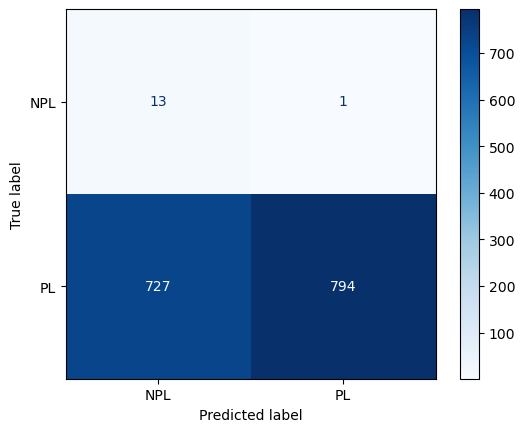

In [308]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model_random, X_test, y_test, cmap='Blues', values_format='d')

### Export Model with Hypertuning RandomizedSearchCV

In [304]:
pickle_out = open("RandomForest-RandomizedSearchCV.pkl", "wb")
pickle.dump(rdf_classifier, pickle_out)
pickle_out.close()